**Imports**

In [2]:
import os
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTENC
from pathlib import Path

In [ ]:
dataset_path = Path('.') / 'datasets' / ''

# Clean dataset

In [3]:
data = pd.read_csv('clean_dataset.csv', header=0, index_col=0)

In [4]:
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


In [5]:
binary_categories = ['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'STDs:condylomatosis', 'STDs:cervical condylomatosis',
                     'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease',
                     'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'Dx:Cancer',
                     'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']
continuous_categories = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes (years)', 
                         'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)', 'STDs: Number of diagnosis']

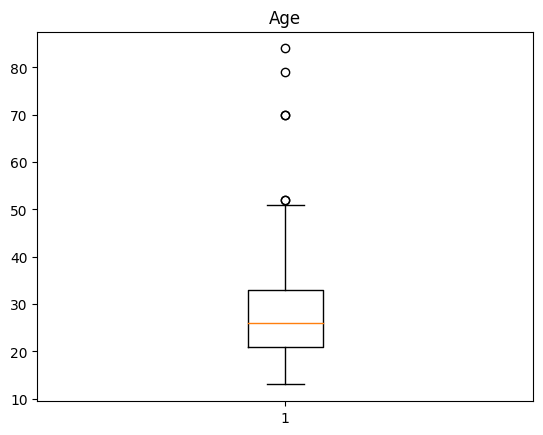

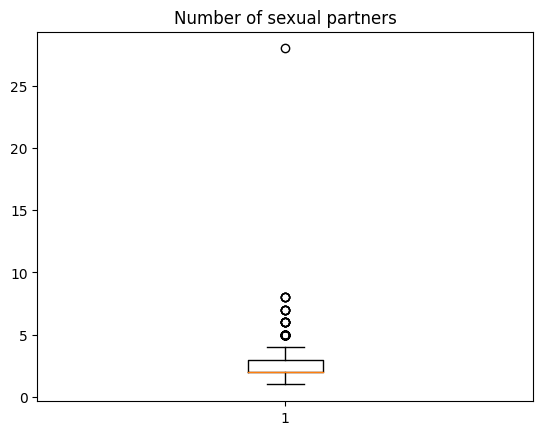

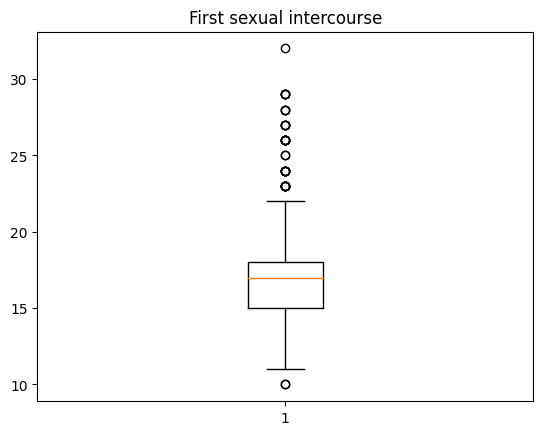

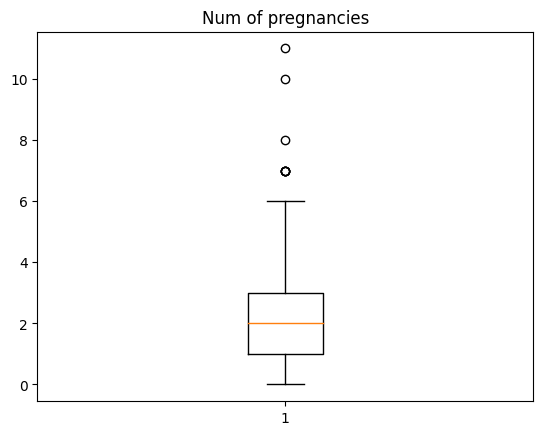

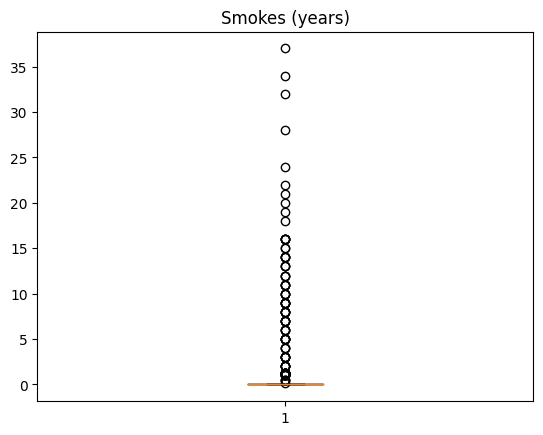

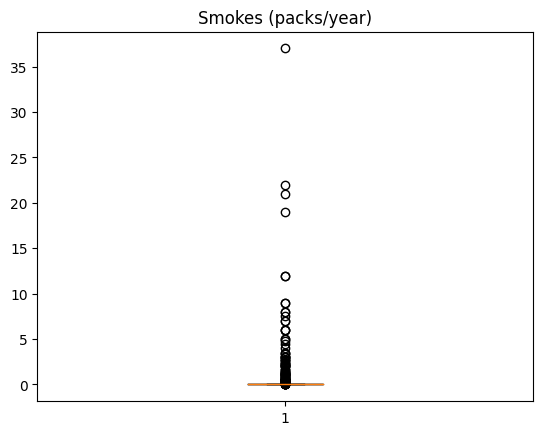

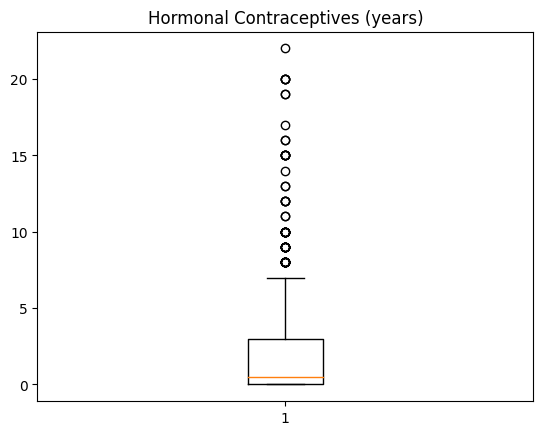

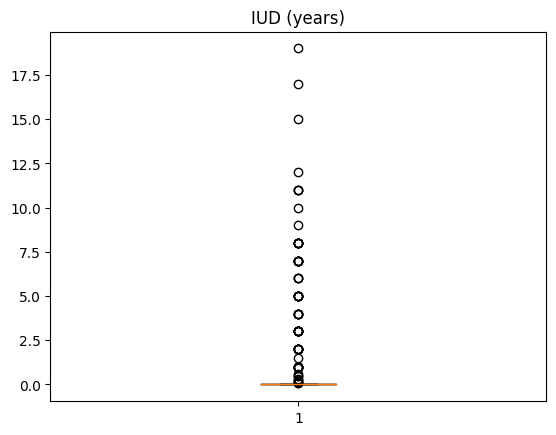

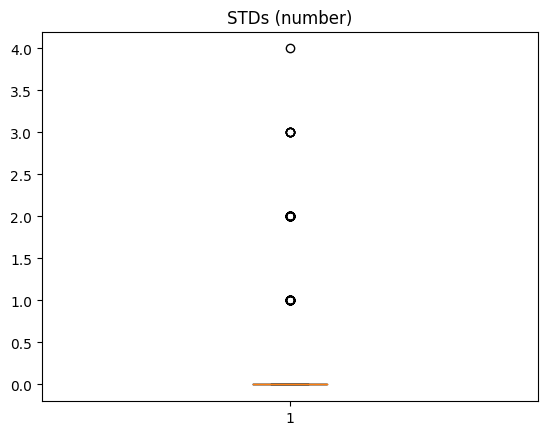

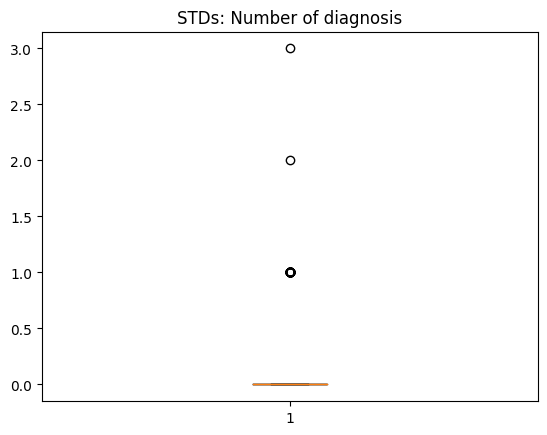

In [6]:
%matplotlib inline

df = data

for col in df:
    if df[col].dtype == 'object' or col in binary_categories:
        continue
    fig, axs = plt.subplots()
    axs.boxplot(df[col])
    axs.set_title(col)

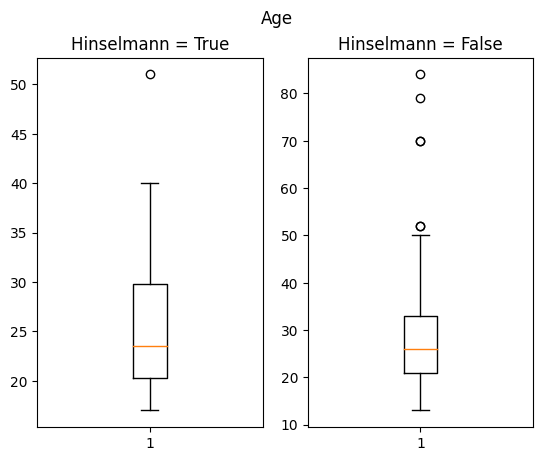

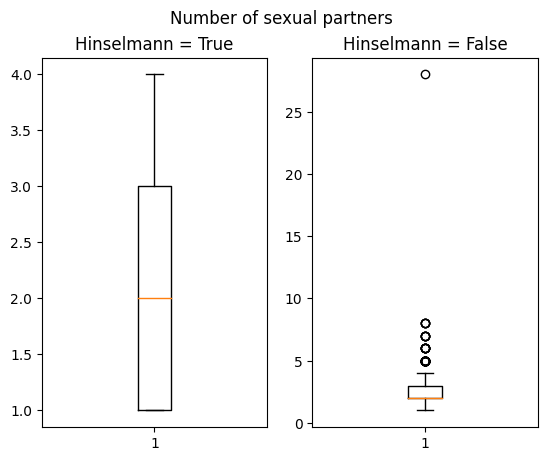

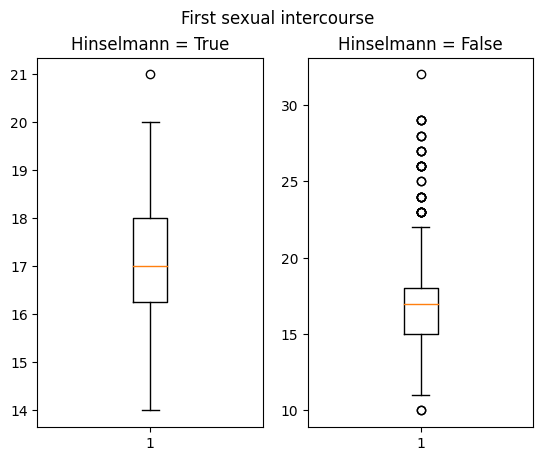

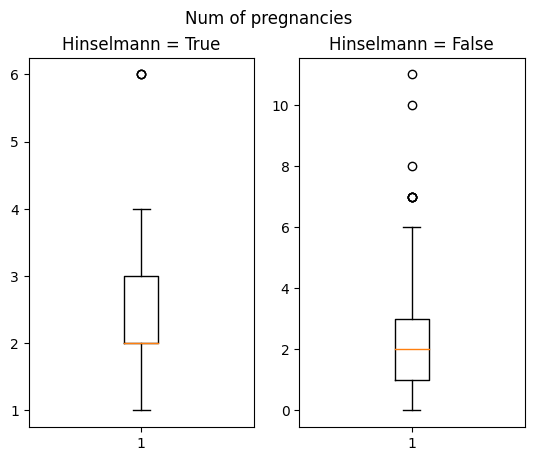

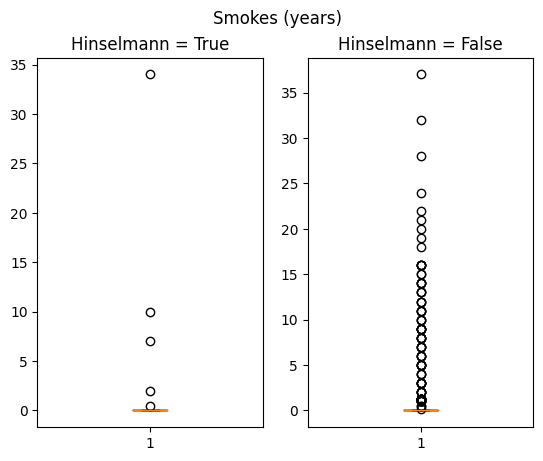

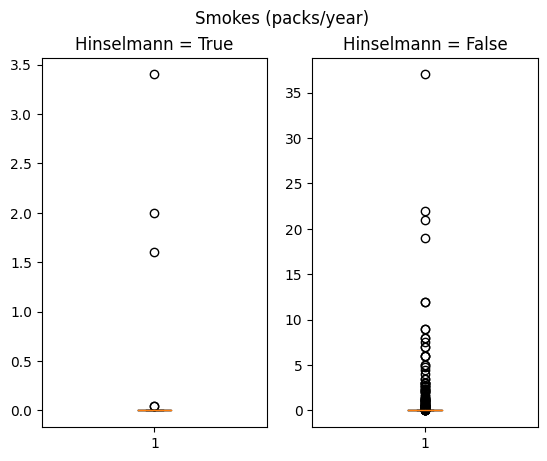

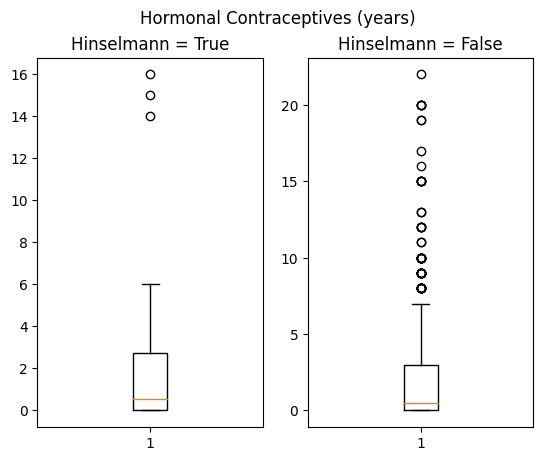

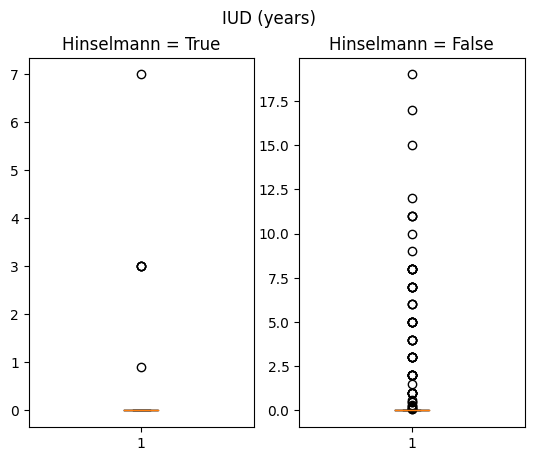

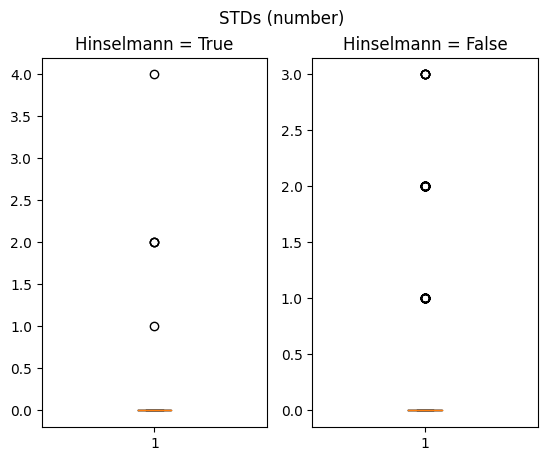

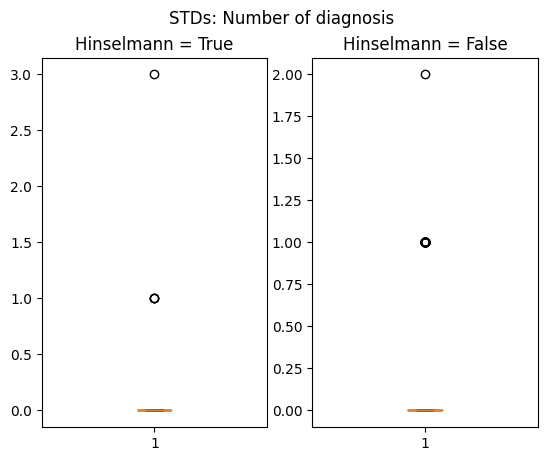

In [7]:
%matplotlib inline

df_positive = df[df["Hinselmann"] == True]
df_negative = df[df["Hinselmann"] == False]

for col in df:
    if df[col].dtype == 'object' or col in binary_categories:
        continue
    fig, axs = plt.subplots(1, 2)
    fig.suptitle(col)
    axs[0].boxplot(df_positive[col])
    axs[0].set_title('Hinselmann = True')
    axs[1].boxplot(df_negative[col])
    axs[1].set_title('Hinselmann = False')

# Attributes histograms

## Binary attributes

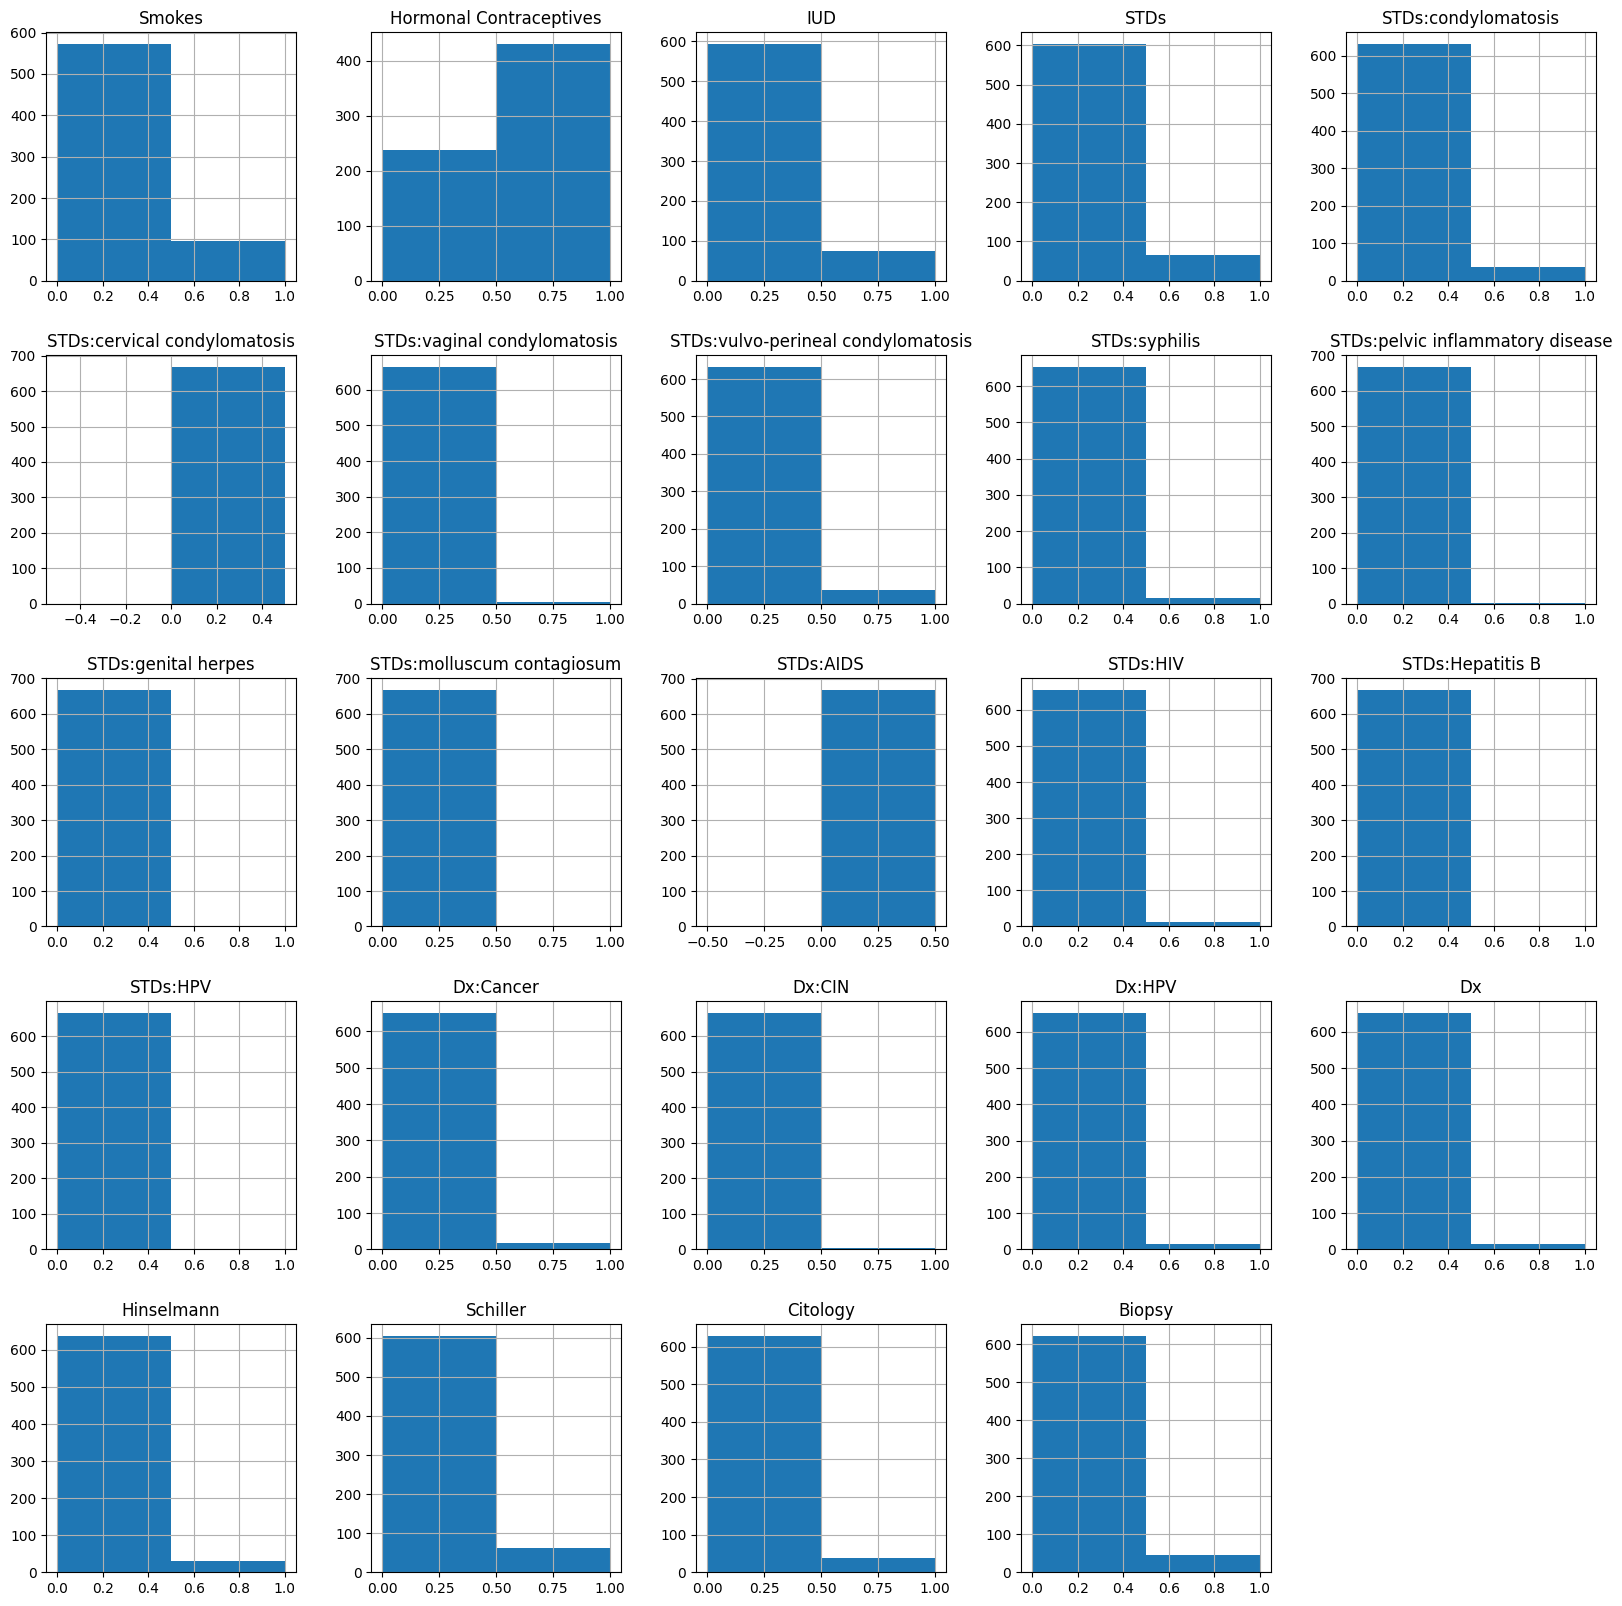

In [11]:
df[binary_categories].hist(figsize=(20,20), bins=2)
print()

## Continuous attributes

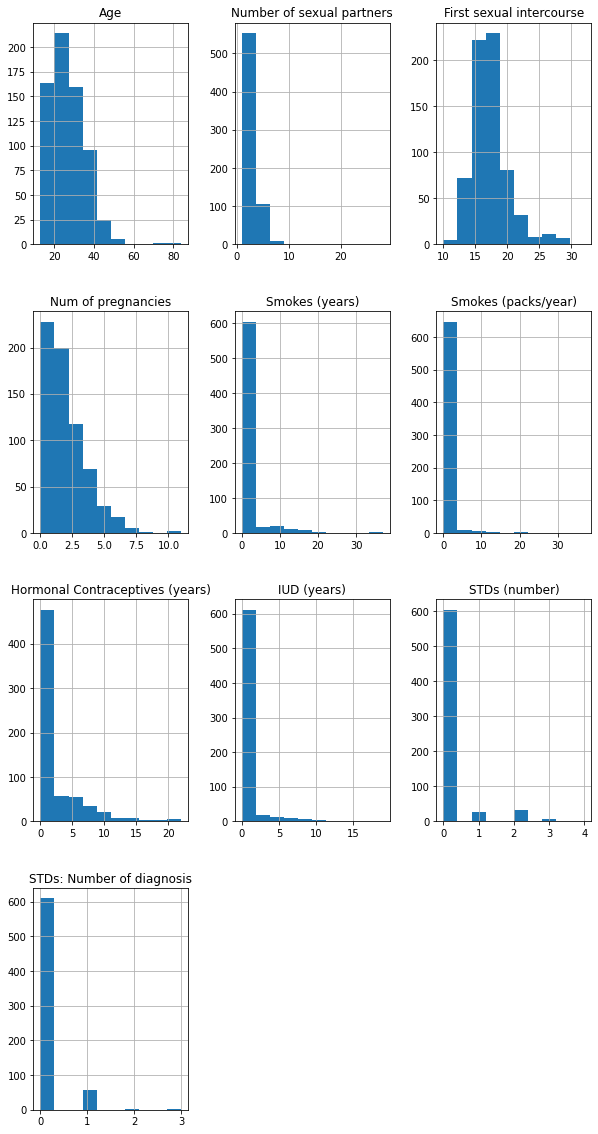

In [21]:
df.drop(binary_categories, inplace=False, axis=1).hist(figsize=(10,20))
print()

In [12]:
df = data

In [13]:
corr = df.corr()
corr.style.background_gradient(cmap='copper_r')

C:\Users\Xileny\Anaconda3\envs\ds_cervical_cancer\lib\site-packages\pandas\io\formats\style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\Xileny\Anaconda3\envs\ds_cervical_cancer\lib\site-packages\pandas\io\formats\style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,0.086533,0.372709,0.562229,0.055570,0.225829,0.119631,0.087482,0.292857,0.260514,0.206688,0.006242,-0.018520,-0.029120,nan,0.006542,-0.026257,0.009298,0.025463,-0.032256,-0.001176,nan,-0.001795,-0.032256,0.042321,-0.009647,0.105179,-0.022579,0.092913,0.039025,-0.030625,0.084757,-0.034654,0.056209
Number of sexual partners,0.086533,1.000000,-0.150872,0.098446,0.233542,0.157667,0.164829,0.010872,0.027334,0.042537,0.008065,0.024478,0.003054,-0.013521,nan,-0.048487,-0.011577,0.031690,0.034869,-0.036001,0.034869,nan,0.034305,-0.012377,0.015916,0.028022,0.023736,0.046826,0.033551,0.039524,-0.060498,-0.021903,0.013890,-0.002106
First sexual intercourse,0.372709,-0.150872,1.000000,-0.070213,-0.095313,-0.031433,-0.026922,0.028351,0.003205,-0.046032,-0.042287,-0.007522,0.009743,0.024659,nan,0.077829,0.029963,-0.110380,-0.001932,0.025241,-0.015519,nan,0.004378,0.011654,0.035723,-0.020016,0.051974,-0.034775,0.026537,0.036844,-0.003212,0.000073,-0.005705,0.028501
Num of pregnancies,0.562229,0.098446,-0.070213,1.000000,0.087312,0.202741,0.105120,0.155756,0.214918,0.219399,0.156386,0.034435,0.000200,-0.031127,nan,-0.003888,-0.030068,0.111444,-0.061439,-0.034995,0.044338,nan,0.020697,-0.034995,-0.030815,0.036106,0.035725,0.015748,0.059019,0.032272,0.036034,0.096651,-0.041908,0.046700
Smokes,0.055570,0.233542,-0.095313,0.087312,1.000000,0.719698,0.479872,0.010725,0.044432,-0.051074,-0.033530,0.124675,0.116616,0.068705,nan,0.078830,0.072313,0.110728,-0.015863,-0.015863,-0.015863,nan,0.034962,0.094515,0.055657,0.097559,-0.012007,-0.027516,0.019554,-0.064176,0.014189,0.028416,-0.029208,0.026099
Smokes (years),0.225829,0.157667,-0.031433,0.202741,0.719698,1.000000,0.719100,-0.013412,0.036247,0.039985,0.046639,0.082558,0.091425,0.049278,nan,0.125290,0.051873,0.024115,-0.011416,-0.011416,-0.011416,nan,0.059320,0.108704,0.055767,0.069037,0.061238,-0.019803,0.068921,-0.046187,0.028348,0.062863,-0.026184,0.036584
Smokes (packs/year),0.119631,0.164829,-0.026922,0.105120,0.479872,0.719100,1.000000,0.001055,0.012486,0.014682,0.020436,0.025540,0.032321,0.012565,nan,0.044585,0.014031,0.000558,-0.007612,-0.007612,-0.007612,nan,0.039149,0.108487,-0.008895,0.025863,0.119537,-0.013204,0.127199,-0.030796,-0.020647,-0.019500,-0.032816,-0.007776
Hormonal Contraceptives,0.087482,0.010872,0.028351,0.155756,0.010725,-0.013412,0.001055,1.000000,0.457789,0.046750,-0.040411,-0.029968,-0.036626,-0.011170,nan,-0.063809,-0.016247,-0.013834,0.028807,0.028807,-0.052045,nan,-0.053591,-0.052045,0.040769,-0.039413,0.020978,0.003219,0.034767,-0.006121,0.040580,0.004771,-0.014729,0.012882
Hormonal Contraceptives (years),0.292857,0.027334,0.003205,0.214918,0.044432,0.036247,0.012486,0.457789,1.000000,0.099699,-0.010854,-0.002528,-0.011114,0.002213,nan,-0.042545,0.004540,-0.000952,-0.016023,-0.021225,-0.023826,nan,-0.028451,-0.023826,0.054628,-0.033713,0.056982,0.012813,0.066478,-0.016839,0.019653,0.081957,0.018749,0.083751
IUD,0.260514,0.042537,-0.046032,0.219399,-0.051074,0.039985,0.014682,0.046750,0.099699,1.000000,0.745261,0.043232,0.047683,0.079724,nan,0.033859,0.062118,-0.053900,-0.013770,-0.013770,-0.013770,nan,0.018551,-0.013770,-0.019489,0.031175,0.093078,-0.023887,0.037326,0.099351,0.060255,0.096157,0.012564,0.074680
